**Modelos Lineares com scikit-learn**

_Esta aula é baseada no Cap.4 de Hands on Machine Learning._

# Ajuste do Ambiente

Esta seção prepara o ambiente.

A primeira providência que devemos tomar é atualizar o pacote gráfico seaborn. No Google Colab ele é carregado na versão 0.7.1. Porém a versão mais atual é a 0.9.0. Para atualizar precisamos instalar o mesmo explicitamente através de `!pip`. Em seguida o kernel deve ser reinicializado o que é efetuado com `os._exit(00)` (depois de importar o pacote `os` com `import os` é claro). Veja a seguir:

In [0]:
!pip install seaborn==0.9.0
import os
os._exit(00)

    100% |████████████████████████████████| 215kB 26.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

Em seguida habilitamos o acesso do Colaboratory ao sistema de arquivos do Google Drive e ao diretório de trabalho deste Jupyter Notebook

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/machinelearning/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


O próximo passo é carregar as constantes de trabalho, através de um dicionário (estrutura de dados padrão do Python) de parâmetros

In [0]:
#########################################################
# Preparação do ambiente                                #
#########################################################
# Esta célula deve ser executada sempre que o kernel for#
#  reinicializado. Ela irá preparar o ambiente para uso #
#  carregando variáveis globais e bibliotecas           #
#  apropriadas. Isto facilitará a execução dos demais   #
#  códigos durante o desenvolvimento.                   #
#########################################################

#########################################################
# Dicionário de parâmetros (variáveis globais) (início) #
#########################################################
parametros = { 
                #########################################
                # Usar um número de epocas de treino    # 
                #  padronizado para facilitar o ajuste  #
                #  entre a geração  dos dados de treino #
                #  e os gráficos animados               #
                #########################################
                'epocas' : 50,

                #########################################
                # Espessura é o quanto os eixos x e y   #
                #  serão maiores que os valores mínimo e#
                #  máximo dos seus respectivos datasets #
                #########################################
                'espessura' : 0.5,

                #########################################
                # Precisão é o número de casas decimais #
                #  utilizado nas impressões em geral    #
                #########################################
                'precisao' : 3,

                #########################################
                # Usar um número padronizado de quadros #
                #  para as funções gráficas com animação#
                #########################################
                'quadros':50,

                #########################################
                # Utilizar a mesma seed para todos os   #
                #  estados de número aleatório ao longo #
                #  do script. A mistura de uma chamada  #
                #  np.random.seed(1234) com um          # 
                #  random_state=42 produziu diferenças  #
                #  entre os dados de treino e os valores#
                #  que foram apresentados nos gráficos  #
                #########################################
                'semente':42,

                #########################################
                # Taxa de aprendizado default para os   #
                #  modelos de machine learning          #
                #########################################
                'taxa_aprend':0.1}



Após o carregamento do dicionário, vamos carregar as bibliotecas necessárias para execução dos exercícios.

In [0]:
#########################################################
# Carregamento das bibliotecas de setup e debug         #
#########################################################
import os; os.getcwd()
import sys; sys.path
import copy; a = 1; b = copy.deepcopy(a); del(a,b)

#########################################################
# Carregamento das bibliotecas de cálculo               #
#########################################################
import numpy as np
np.set_printoptions(precision=parametros['precisao'])
np.random.seed(parametros['semente'])

#########################################################
# Carregamento das bibliotecas gráficas                 #
#########################################################
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib.colors import ListedColormap

#########################################################
# Carregamento e setup das bibliotecas de animação graf.#
#########################################################
from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" #ou "jshtml"

#########################################################
# Carregamento dos pacotes de dados e funções de M.L.   #
#########################################################
from sklearn.datasets import make_circles, make_moons, \
                             load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#########################################################
# Pacote com recursos de matemática avançados.          #
#  Utilizaremos o recurso math.inf (infinito)           #
#########################################################
import math


O parâmetro a seguir é utilizado para permitir a inserção de gráficos diretamente no Jupyter Notebook.

In [0]:
%matplotlib inline

# Regressão Linear através da Equação de Regressão (Forma Matricial)

A biblioteca numpy inclui as funções de números aleatórios e já foi previamente carregada na seção de setup deste notebook através da linha de comando: `import numpy as np`

Observe a seguir a função rand. rand(5) irá produzir 5 números aleatórios em um numpy array 1D

In [6]:
np.random.rand(5)

array([0.375, 0.951, 0.732, 0.599, 0.156])

Agora observe quando utilizamos rand(5,1). Será gerado um numpy array 2D 5x1. É importante lembrar que um numpy array 1D com 5 elementos é DIFERENTE de um numpy array 2D (5x1).

In [7]:
np.random.rand(5,1)

array([[0.156],
       [0.058],
       [0.866],
       [0.601],
       [0.708]])

Veja agora o que ocorre quando executamos np.random.rand(5,2). Geramos um numpy array (5x2), ou seja 10 amostras de uma distribuição uniforme, espalhadas por um array de 5 linhas e 2 colunas.

In [8]:
np.random.rand(5,2)

array([[0.021, 0.97 ],
       [0.832, 0.212],
       [0.182, 0.183],
       [0.304, 0.525],
       [0.432, 0.291]])

A seguir vamos simular dados para recuperar o padrão original. Lembre-se que o código a seguir funciona porque a biblioteca `numpy` já foi previamente carregada no início deste notebook (seção de setup)

Primeiro criamos um vetor `x1` (100,1) com 100 números aleatórios entre 0 e 2 (por isso o 2 * na expressão)

In [0]:
x1 = 2 * np.random.rand(100,1)

Vamos agora observar as 5 primeiras linhas do array `x1`. 
Observe o efeito de usar `x1[:5]`. Ao fazermos isso temos como resultado um array 2D [5x1].
Isto pode ser confirmado pela propriedade "shape"

In [16]:
x1[:5]

array([[0.339],
       [1.114],
       [1.872],
       [1.392],
       [1.14 ]])

In [17]:
x1[:5].shape

(5, 1)

Se utilizamos `x1[:5,0]` (lembre-se os índices em Python começam em 0) teremos como resultado um array 1D.

In [21]:
x1[:5,0]

array([0.339, 1.114, 1.872, 1.392, 1.14 ])

In [19]:
x1[:5,0].shape

(5,)

Vamos agora criar um vetor y o qual irá receber os valores da variável de saida do modelo (variável dependente).
Este vetor y será composto de uma relação com os valores de `x1` (Y=4+3\*x1) mais um fator aleatório (um erro)

In [0]:
y = 4 + 3 * x1 + np.random.randn(100, 1)

Façamos agora passo a passo um gráfico de dispersão de Y e X através da biblioteca seaborn. Para usar a seaborn os dados precisam estar em um formato de dataframe. Para colocar os dados em um dataframe, precisamos primeiro colocar os dados em uma matriz. A forma padrão é agrupar os vetores em um numpy array 2D, o que pode ser feito com a função numpy `column_stack`. Para usuários de `R`, devemos lembrar que a função executada pelo operador `c()` do `R` no Python é efetuada pelos colchetes `[]`, os quais são o operador de lista do Python. 

In [0]:
matriz = np.column_stack([x1,y])
dados = pd.DataFrame(data=matriz, columns = ['x1','y'])

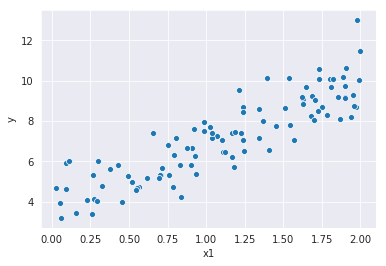

In [42]:
sns.scatterplot(data=dados, x='x1', y='y')
plt.show()

A vantagem do uso da `seaborn` reside no fato dela requerer poucos parâmetros para gerar um gráfico. Além disso, para usuários de `R` ela é mais intuitiva que os comandos da `matplotlib`, pois é muito similar ao pacote gráfico `ggplot2` do `R`. Observe a seguir um gráfico similar feito pela `matplotlib`.  

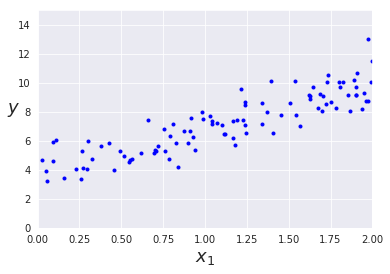

In [43]:
plt.plot(x1, y, "b.") #Gráfico básico. Somente "b" indica pontos em azul.
                     # "b." indica pontos em azul, formato pequeno
plt.xlabel("$x_1$", fontsize=18) #Label do eixo dos x
plt.ylabel("$y$", rotation=0, fontsize=18) #Label do eixo dos y
plt.axis([0, 2, 0, 15]) #Dimensões dos eixos: x:0 a 2, y:0 a 15
plt.show()

Voltando para a `seaborn`, observe outra forma de criar o dataframe Pandas associado. 

Neste exemplo ao invés de criar um array numpy com duas colunas, vamos criar um dicionário com duas entradas (*keys*). Esta forma é também mais intuitiva para os usuários do `R`, em especial aqueles acostumados com a biblioteca `dplyr`. A aplicação do método `.ravel()` aos numpy arrays X e y é necessária pois a biblioteca pandas requer arrays 1D nas suas colunas. 

Outro ponto a ser mencionado é que a `seaborn` utiliza ela própria os comandos da `matplotlib`, os quais podem ser combinados para produzir um resultado visual mais complexo.

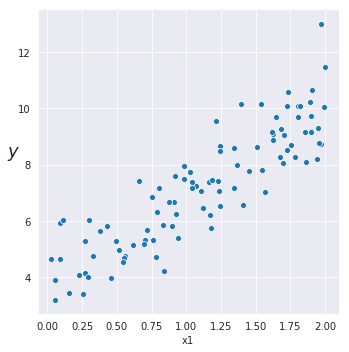

In [44]:
dados = pd.DataFrame({"x1":x1.ravel(), "y":y.ravel()})
graf = sns.relplot(x="x1", y="y", data=dados)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show(graf)

Vamos agora preparar o modelo de regressão linear. Precisamos criar a matrix **X**, a qual tem na primeira coluna uma sequência de uns e na segunda coluna os valores da variável *x*. A função np.ones produz um vetor composto de uns na dimensão indicada. Observe a seguir um exemplo em que é gerado um numpy array 2D (5x1) composto de uns

In [0]:
np.ones((5,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

A função np.c_ concatena arrays pelas suas colunas. No exemplo abaixo vamos unir um array 2D (5x1) composto de uns com as 5 primeiras linhas do array 2D X. Observe que tanto as representações 2D (X[:5]) e 1D (X[:5,0]) são aceitas.

In [0]:
np.c_[np.ones((5,1)), X[:5]]

array([[1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997]])

Vamos gerar agora a coluna de 1s para todos os elementos de X. Poderíamos ter utilizado np.ones(100,1), pois sabemos que X tem 100 elementos (neste caso). Mas para tornar nosso exemplo mais genérico, calculamos o número de elementos de X através de len(X). Vide abaixo.

In [0]:
X_b = np.c_[np.ones((len(X),1)),X]
X_b[:5,:]

array([[1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997]])

Uma vez tendo as matrizes **X** e **y** os parâmetros $ \beta_0 $ e $\beta_1$ do modelo poderão ser calculados através da fórmula matricial: $$\mathbf{\vec{\beta}}=(\mathbf{X}^{t}.\mathbf{X})^{-1}.(\mathbf{X}^{t}.\mathbf{y}) $$ A seguir vamos calcular esta expressão matricial passo a passo. Nos exemplos utilizaremos apenas as 5 primeiras linhas das matrizes **X** e **y** por conveniência. Na expressão final utizaremos as matrizes completas, é claro.

$\mathbf{X}^{t}$ é a transposta de $\mathbf{X}$

In [0]:
X_b[:5]

array([[1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997]])

In [0]:
X_b[:5].T

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.22370579, 0.27898772, 0.5842893 , 0.73272369, 0.91213997]])

O produto de $\mathbf{X}^{t}$ com $\mathbf{X}$ é obtido pelo método *.dot()*.
Para fazer **A**.**B** utilizamos **A**.dot(**B**). Observe que o método *.dot()* é um método da primeira matriz (neste caso **A**), o qual recebe como parâmetro a segunda matriz (neste caso **B**).

In [0]:
(X_b[:5].T).dot(X_b[:5])

array([[5.        , 3.73184646],
       [3.73184646, 3.28556731]])

A inversa de $ (\mathbf{X}^{t}.\mathbf{X}) $ é obtida através de np.linalg.inv

In [0]:
np.linalg.inv(X_b.T.dot(X_b))

array([[ 0.03644733, -0.0274925 ],
       [-0.0274925 ,  0.02857898]])

Observe por último a forma como a sequência de mulltiplicações matriciais é feita. A fórmula foi apresentada no formato:  $$\mathbf{\vec{\beta}}=(\mathbf{X}^{t}.\mathbf{X})^{-1}.(\mathbf{X}^{t}.\mathbf{y}) $$ Porém ela pode ser executada da seguinte forma:  $$\mathbf{\vec{\beta}}=(\mathbf{X}^{t}.\mathbf{X})^{-1}.\mathbf{X}^{t}.\mathbf{y} $$. Isto permite utilizar o método *.dot()* que implementa as multiplicações matriciais, em sequência. Vide a seguir:

In [0]:
np.linalg.inv(X_b.T.dot(X_b))

array([[ 0.03644733, -0.0274925 ],
       [-0.0274925 ,  0.02857898]])

Observe através do método .shape que a matriz fica grande demais para ser apresentada (100 colunas). Vamos mostrar na célula seguinte apenas as cinco primeiras colunas.

In [0]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).shape

(2, 100)

In [0]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T)[:,:5]

array([[ 0.00280459,  0.02877726,  0.02038375,  0.01630292,  0.01137032],
       [ 0.00747976, -0.01951932, -0.01079411, -0.00655201, -0.00142447]])

Por último calculamos finalmente os melhores coeficientes para o modelo linear.

In [0]:
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [0]:
beta_best

array([[3.88188906],
       [3.14316212]])

Vamos agora previsões para os valores de **y** a partir de dois valores de  x, a saber x=0 e x=2.
Para tal vamos gerar uma matriz **X** cuja primeira coluna terá apenas 1s e na segunda coluna teremos 0 e 2 respectivamente.
Com a nova matriz **X** montada, basta multiplicar ela por $\mathbf{\vec{\beta}}$ para obter as previsões de **y**.

In [0]:
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [0]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [0]:
y_predict = X_new_b.dot(beta_best)
y_predict

array([[ 3.88188906],
       [10.1682133 ]])

Vamos agora traçar uma reta unindo os dois extremos do intervalo de observações x=0 e x=2

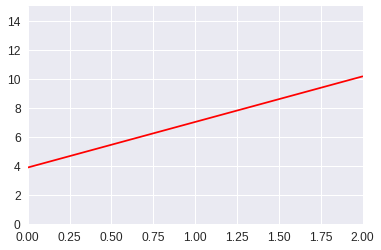

In [0]:
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

E em seguida vamos sobrepor esta linha ao gráfico das observações de x e y.

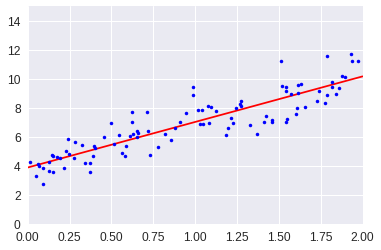

In [0]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Por último acrescentamos título e legendas aos eixos do gráfico.

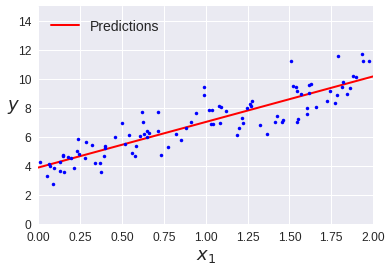

In [0]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Todo este procedimento pode ser implementado de forma quase automática pelo scikit-learn através da classe LinearRegression.

In [0]:
from sklearn.linear_model import LinearRegression

Após importar a classe criamos um objeto do tipo LinearRegression

In [0]:
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Em seguida passamos para o objeto de regressão linear os valores de X e y e pedimos para ele ajustar o modelo aos dados através do método ".fit". Observe que não é necessário criar a matrix **X**. 

In [0]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Uma vez ajustado aos dados, podemos obter do modelo os valores de $\beta_0$ e $\beta_1$ (intercepto e coeficiente linear respectivamente) através das propriedas ".intercept_" e ".coef_"

In [0]:
lin_reg.intercept_, lin_reg.coef_

(array([3.88188906]), array([[3.14316212]]))

E as previsões podem ser obtidas através do método ".predict". Lembrando que X_new tinha dois valores x=0 e x=2, vamos obter as previsões diretamente para estes valores.

In [0]:
lin_reg.predict(X_new)

array([[ 3.88188906],
       [10.1682133 ]])

Para conhecimento a classe `LinearRegression` executa os cálculos utilizando-se da função `scipy.linalg.lstsq()` ("least squares", o que significa "mínimos quadrados"), a qual pode ser chamada de forma direta:

In [0]:
beta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
beta_best_svd, residuals, rank, s

(array([[3.88188906],
        [3.14316212]]),
 array([88.54910873]),
 2,
 array([14.52392025,  4.07279723]))

Detalhe de implementação matemática (pode ser ignorado em um primeiro curso): Esta função calcula a matriz inversa e o produto com a transposta de **X** na fórmula de regressão através da chamada matriz *pseudo-inversa* (utilizando o método de Moore-Penrose). Ela pode ser calculada de forma direta através da função `np.linalg.pinv()`. Este método baseia-se em um processo de decomposição (desmontagem se preferir) chamado de decomposição SVD, o qual será apresentado quando estudarmos a técnica dos componentes principais (PCA).

In [0]:
np.linalg.pinv(X_b).dot(y)

array([[3.88188906],
       [3.14316212]])

A técnica da pseudo-inversa possui complexidade $O(n^2)$  em relação ao número de features. Isto quer dizer que se o número de features (colunas) no modelo dobrar o tempo de computação é multiplicado por 4. 

Ela no entanto é capaz de gerar resultados mesmo quando existe multi-colinearidade (quando neste caso $\mathbf{X}^t.\mathbf{X}$ não sendo invertível, faz a expressão de regressão falhar). 

De forma geral a classe `LinearRegression` é baseada na solução analítica, não escala de forma adequada em relação ao número de features (colunas), escala de forma linear com o número de instâncias (linhas), todos os dados precisam ser carregados para a memória, não requer que os valores das variáveis independentes sejam escalonados ou normalizados e a ordem com a qual os dados de entrada são passados para a classe não interessa.

# Regressão Linear utilizando Batch Gradient Descent

O algoritmo de Gradient Descent utiliza o valor das derivadas do MSE em relação a cada um dos $\beta$s para calcular aproximações sucessivas dos valores ideais (neste caso) de $\beta_0$ e $\beta_1$. O vetor Gradiente, no qual cada linha (componente) do mesmo é o valor da derivada do MSE em relação a cada um dos $\beta$s pode ser obtido diretamente das matrizes **X** e **y** através da seguinte operação matricial: $$\vec{\nabla}(MSE)=\frac{2}{n}\mathbf{X}^t.(\mathbf{X\beta-y})$$ Uma vez conhecido o gradiente, devemos ir na direção contrária do mesmo, se queremos minimizar o MSE. Portanto devemos atualizar nossa estimativa de $ \vec{\beta} $ da seguinte forma: $$ \vec{\beta_{i+1}} = \vec{\beta_{i}}-\eta\vec{\nabla}(MSE) $$ onde $\eta$ é um parâmetro arbitrário de ajuste. 

Vamos nas células a seguir mostrar passo a passo o processo de ajuste.
Primeiro vamos escolher o parâmetro de ajuste $\eta$ que neste caso será igual a 0,1

In [0]:
eta = 0.1

Nosso modelo possui dois betas, $\beta_0$ e $\beta_1$, portanto temos que inicializar um vetor $\vec{\beta}$ (2x1), o qual pode ser feito através de np.random.randn(2,1) (vide a seguir). Lembrando que np.random.rand traz amostras de uma distribuição uniforme entre 0 e 1 e np.random.randn traz as amostras de uma distribuição normal com média 0 e desvio 1.

In [0]:
beta = np.random.randn(2,1)
beta

array([[ 0.21409374],
       [-1.24573878]])

Vamos trabalhar com 1.000 aproximações. Observe que o algorítmo de gradient descent é um processo iterativo, ao contrário da expressão de regressão que é uma expressão determinística. Logo devemos ter um critério de parada. Ele pode ser tanto a melhoria absoluta percentual mínima esperada para o MSE entre duas iterações ou simplesmente o número de iterações do modelo. Neste caso vamos utilizar o número de iterações.

In [0]:
n_iteracoes = 1000

Apenas para lembrar, n é o número de amostras que temos, ou seja, o comprimento das matrizes **X** e **y**, o qual neste caso é 100.

In [0]:
n = len(X)
n

100

Vamos agora implementar o processo de 1.000 melhorias do vetor $\vec{\beta}$ através do cálculo do gradiente pela fórmula: $$\vec{\nabla}(MSE)=\frac{2}{n}\mathbf{X}^t.(\mathbf{X\beta-y})$$ seguida do ajuste do vetor  $ \vec{\beta} $ da seguinte forma: $$ \vec{\beta_{i+1}} = \vec{\beta_{i}}-\eta\vec{\nabla}(MSE) $$ Do exercício anterior devemos lembrar que as matrizes **X** e **y** foram representadas no Python por `X_b` e `y``.

In [0]:
for iteracao in range(n_iteracoes):
    gradiente = 2/n * X_b.T.dot(X_b.dot(beta) - y)
    beta = beta - eta * gradiente

In [0]:
beta

array([[3.88188906],
       [3.14316212]])

Tal como no exercício anterior podemos gerar novas previsões para x=0 e x=2. Lembrando que `X_new_b` é uma matriz do tipo **X** com a primeira coluna composta de 1s, conforme pode ser visto abaixo:

In [0]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [0]:
X_new_b.dot(beta)

array([[ 3.88188906],
       [10.1682133 ]])

Vamos agora fazer um gráfico mostrando as dez primeiras aproximações sucessivas da reta de regressão.
Primeiro vamos lembrar que o comprimento das matrizes **X** e **y** costuma ser armazenado na variável `n`

In [0]:
n = len(X_b)
n

100

Além disso, como foi visto acima, `X_new_b` é um array (2x2) com a primeira coluna composta de uns e a segunda dos valores extremos de x no intervalo, isto é x=0 e x=2. Isto ajuda no desenho da reta de regressão. Para recordar, o `X_new_b` é apresentado novamente a seguir:

In [0]:
X_new_b

array([[1., 0.],
       [1., 2.]])

Vamos reinicializar o vetor $\vec{\beta}$ para recalcular as aproximações sucessivas

In [0]:
np.random.seed(42)
beta = np.random.randn(2,1)
beta

array([[ 0.49671415],
       [-0.1382643 ]])

E neste exercício estamos considerando que o parâmetro $\eta$ continua igual a 0.1

In [0]:
eta

0.1

Começamos desenhando (plotando) a dispersão dos valores observados das variávels `X` e `y`.

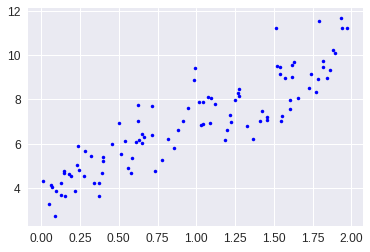

In [0]:
plt.plot(X,y,"b.")
plt.show()

Queremos sobre os gráficos das aproximações sucessivas ao gráfico da dispersão. Por isso precisamos executar plt.show() somente ao final da célula.

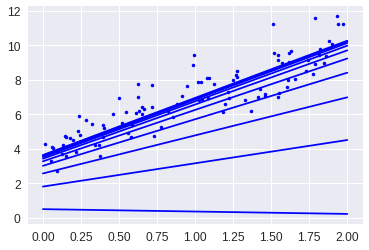

In [0]:
n = len(X_b)
X_new_b = np.array([[1,0],[1,2]])
eta = 0.1
np.random.seed(42)
beta = np.random.randn(2,1)

plt.plot(X,y,"b.")
for iteracao in range(10):
  y_predict = X_new_b.dot(beta)
  plt.plot(X_new, y_predict, "b-")
  gradiente = 2/n * X_b.T.dot(X_b.dot(beta)-y)
  beta = beta - eta * gradiente
plt.show()

Vamos sofisticar um pouco nosso gráfico. Vamos marcar a primeira reta de regressão em vermelho tracejado.

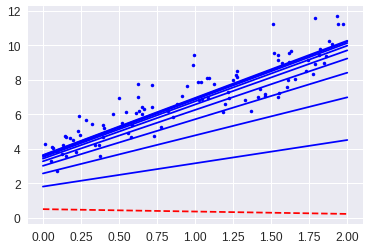

In [0]:
n = len(X_b)
X_new_b = np.array([[1,0],[1,2]])
eta = 0.1
np.random.seed(42)
beta = np.random.randn(2,1)

plt.plot(X,y,"b.")
for iteracao in range(10):
  y_predict = X_new_b.dot(beta)
  if iteracao==0:
    plt.plot(X_new, y_predict, "r--")  
  else:
    plt.plot(X_new, y_predict, "b-")
  gradiente = 2/n * X_b.T.dot(X_b.dot(beta)-y)
  beta = beta - eta * gradiente
plt.show()

Vamos agora tornar a geração deste gráfico uma função dos parâmetros $\beta$ e $\eta$. Vamos fazer isso para desenhar os gráficos de aproximações sucessivas para três valores distintos de $\eta$.

In [0]:
def plota_BGD(beta, eta):
  n = len(X_b)
  X_new_b = np.array([[1,0],[1,2]])

  plt.plot(X,y,"b.")
  for iteracao in range(10):
    y_predict = X_new_b.dot(beta)
    if iteracao==0:
      plt.plot(X_new, y_predict, "r--")  
    else:
      plt.plot(X_new, y_predict, "b-")
    gradiente = 2/n * X_b.T.dot(X_b.dot(beta)-y)
    beta = beta - eta * gradiente
    

Testando a função

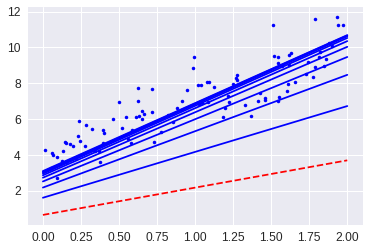

In [0]:
plota_BGD(np.random.randn(2,1), 0.1)
plt.show()

Sofisticando um pouco a mesma (apresentando labels nos eixos e um título no gráfico)

In [0]:
def plota_BGD(beta, eta):
  n = len(X_b)
  X_new_b = np.array([[1,0],[1,2]])

  plt.plot(X,y,"b.")
  for iteracao in range(10):
    y_predict = X_new_b.dot(beta)
    if iteracao==0:
      plt.plot(X_new, y_predict, "r--")  
    else:
      plt.plot(X_new, y_predict, "b-")
    gradiente = 2/n * X_b.T.dot(X_b.dot(beta)-y)
    beta = beta - eta * gradiente
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Reapresentando o gráfico anterior

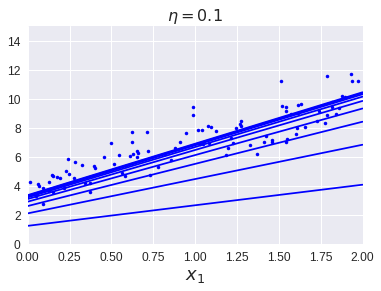

In [0]:
plota_BGD(np.random.randn(2,1), 0.1)
plt.show()

Na próxima célula reinicialzizamos o vetor $\vec{\beta}$ e desenhamos os gráficos em três `subplots`. 
Observe os valores 131, 132 e 133. 131 significa 1 linha, 3 colunas e gráfico na posição 1, 132 na posição 2 e assim sucessivamente.   

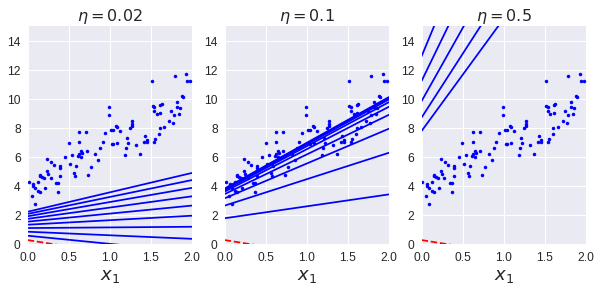

In [0]:
np.random.seed(43)
beta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plota_BGD(beta, eta=0.02)
plt.subplot(132); plota_BGD(beta, eta=0.10)
plt.subplot(133); plota_BGD(beta, eta=0.5)
plt.show()

Vamos refazer os gráficos anteriores apresentando um label no eixo dos y

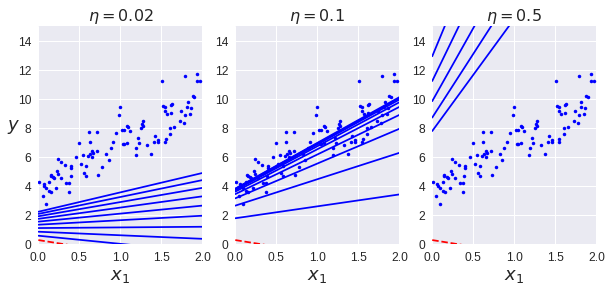

In [0]:
np.random.seed(43)
beta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plota_BGD(beta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plota_BGD(beta, eta=0.10)
plt.subplot(133); plota_BGD(beta, eta=0.5)
plt.show()

# Regressão Linear utilizando Stochastic Gradient Descent

Vamos agora estudar o método SGD (Stochastic Gradient Descent). Na célula a seguir recalculamos n, o número de linhas da matriz **X**, ajustamos o parâmetro (semente) dos números aleatórios para manter os resultados estáveis durante a aula e reinicializamos o vetor $\vec{\beta}$.

In [0]:
n = len(X_b)
np.random.seed(42)
beta = np.random.randn(2,1)

Vamos agora treinar nosso modelo da seguinte maneira: ao invés de fornecer o conjunto completo dos dados a cada rodada de recálculo dos $\beta$s vamos fornecer apenas um subconjunto dos dados. Isto é feito para evitar o uso excessivo de memória (no caso do conjunto de dados original ser muito grande) e acelerar os cálculos.

Cada rodada de cálculo é chamada de *época*. Neste exemplo teremos 50 épocas, ou seja, vamos percorrer o conjunto completo dos dados 50 vezes.

In [0]:
n_epocas = 50

Em cada *epoca* teremos *n* iterações *i*

Sendo assim nosso modelo terá dois loops: um baseado no número de épocas (neste caso 50, e a variável será chamada de *epoca*) e outro no número de iterações, o qual será baseado no comprimento da matriz **X** (neste caso 1.000, sendo a variável chamada de *i*). 

In [0]:
for epoca in range(n_epocas):
  for i in range(n):
    i = i + 1 #expressão qualquer, aqui colocada para o loop poder ser executado
i

100

Em cada iteração *i* iremos escolher uma linha ao acaso das matrizes **X** e **y** através da expressão:

In [0]:
linha_escolhida = np.random.randint(n)
xi = X_b[linha_escolhida:linha_escolhida+1]
yi = y[linha_escolhida:linha_escolhida+1]
xi, yi

(array([[1.        , 1.42648957]]), array([[7.4587864]]))

Lembrando nosso modelo se baseia no cálculo do gradiente do MSE (erro médio quadrado). O gradiente neste caso é calculado pela fórmula: $$\vec{\nabla}(MSE) = 2\mathbf{x_i^t}.(\mathbf{x_i}.\vec{\beta}-\mathbf{y_i})$$ 

Observe que não estaremos mais utilizando as matrizes **X** e **y** e sim subconjuntos das mesmas, indicados na fórmula por $\mathbf{x_i}$ e $\mathbf{y_i}$. 

Sendo assim implementaremos no loop das iterações *i* o cálculo do gradiente para a linha escolhida da seguinte forma:

In [0]:
gradientes = 2 * xi.T.dot(xi.dot(beta) - yi)
gradientes

array([[-14.31860967],
       [-20.42534742]])

O modelo pressupõe que o ajuste do vetor $\vec{\beta}$ seja feito através da fórmula: $$\vec{\beta}_{i+1} = \vec{\beta}_{i} - \eta . \vec{\nabla}(MSE) $$

A cada iteração o parâmetro $\eta$ do modelo será ajustado (isto se chama *método de aprendizagem*). O cálculo é detalhado a seguir. 

Para o cálculo do parâmetro $\eta$ teremos dois *hiperparâmetros* neste caso denominados $t_0$ e $t_1$ cujos valores serão arbitrados em 5 e 50 respectivamente. 

In [0]:
t0, t1 = 5, 50  # hiperparametros do método de aprendizagem

Com base nestes valores, o parâmetro $\eta$ será ajustado de acordo com a fórmula: $$ \eta = \frac{t_0}{(epoca * n + i + t_1)} $$ 

A qual será implementada em Python tal como mostrado a seguir:

In [0]:
eta = t0 / (epoca * n + i + t1)

Lembrando, conforme exposto acima o vetor $\vec{\beta}$ será ajustado de acordo com a fórmula: $$\vec{\beta}_{i+1} = \vec{\beta}_{i} - \eta . \vec{\nabla}(MSE) $$ a qual será implementada em Python pela expressão:

In [0]:
beta = beta - eta * gradientes

Juntando a sequência de loops em uma única célula:

In [0]:
for epoca in range(n_epocas):
  for i in range(n):
    linha_escolhida = np.random.randint(n)
    xi = X_b[linha_escolhida:linha_escolhida+1]
    yi = y[linha_escolhida:linha_escolhida+1]
    gradientes = 2 * xi.T.dot(xi.dot(beta) - yi)
    eta = t0 / (epoca * n + i + t1) # método de aprendizagem
    beta = beta - eta * gradientes

beta

array([[3.87037523],
       [3.09976038]])

Vamos incluir um gráfico mostrando a melhoria da aproximação a medida que o método é executado. Lembrando que `X_new_b` é a matriz do tipo **X** para os pontos extremos do intervalo, a saber x=0 e x=2.

In [0]:
X_new_b

array([[1, 0],
       [1, 2]])

Caso esta matriz seja multiplicada pelo vetor $\vec{\beta}$ teremos as estimativas de y para os extremos do intervalo.

Com estes dois pares de pontos podemos traçar a reta correspondente e sobrepor a mesma ao gráfico de dispersão. 

No exemplo a seguir vamos traçar as retas de regressão para as 20 primeiras iterações (`i<20`) da primeira epoca (`epoca == 0`). 

Além disso, a primeira reta, obtida pela escolha inicial aleatória do vetor $\vec{\beta}$ será desenhada em vermelho tracejado (`style="b-"`).

As demais serão desenhadas em azul continuo (`style="r--"`) 

Primeiro reinicializamos o vetor $\vec{\beta}$

In [0]:
beta = np.random.randn(2,1)

E em seguida executamos o novo código.

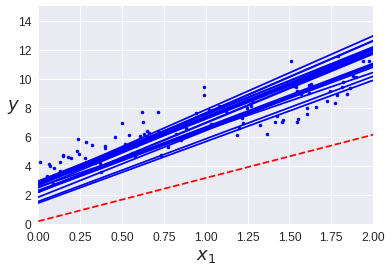

In [0]:
for epoca in range(n_epocas):
  for i in range(n):
    if epoca == 0 and i < 20:
      y_predict = X_new_b.dot(beta)            
      style = "b-" if i > 0 else "r--"         
      plt.plot(X_new, y_predict, style)        
    random_index = np.random.randint(n)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradientes = 2 * xi.T.dot(xi.dot(beta) - yi)
    t = epoca * n + i # taxa de aprendizagem
    eta = t0 / (t + t1) # método de aprendizagem
    beta = beta - eta * gradientes

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                         
plt.show()                                           

In [0]:
beta

array([[3.84893388],
       [3.12018512]])

O modelo implementado passo a passo nas células anteriores pode ser executado diretamente através do scikit-learn.

Primeiro criamos um objeto de regressão do tipo SGD (Stochastic Gradient Descent)

In [0]:
#Foi incluido o parâmetro tol=-math.inf para evitar uma warning de mudança de versão.
import math
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42, tol=-math.inf)


Depois ajustamos os dados disponíveis nos arrays `X` e `y`.

In [0]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

E por último obtemos os valores dos parâmetros (intercepto e coeficiente)

In [0]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90058475]), array([3.16033508]))

# Regressão Linear utilizando Mini-batch Gradient Descent

No caso do método de mini-batch gradient descent, ao invés de utilizarmos apenas uma linha de cada vez do conjunto de treino, escolhemos um conjunto de linhas (denominado de *tamanho do mini-batch*) e a partir desta pequena matriz calculamos o gradiente para ajuste do vetor $\vec{\beta}$. No exemplo a seguir utilizaremos um tamanho de mini-batch igual a 20. Os valores de inicialização do modelo podem ser vistos na célula a seguir:

In [0]:
np.random.seed(42)
beta = np.random.randn(2,1)

n_epocas = 50
tamanho_minibatch = 20

t0, t1 = 200, 1000

O algoritmo a seguir implementa o mini-batch pegando os grupos de valores das matrizes **X** e **y** de forma sequencial em cada época.

Para isto é utilizado o loop a seguir:

In [0]:
for i in range(0, n, tamanho_minibatch):
  a = 0 #Código aqui colocado apenas para o loop poder ser executado

Lembre-se que não haverá problemas de endereçamento no "final" das matrizes **X** e **y** pois índices que estejam fora o intervalo de definição (que vai de 0 até n-1) são ignorados, como o exemplo a seguir demonstra:

In [0]:
X_b[99:101] , X_b[99:120]

(array([[1.        , 1.07868448]]), array([[1.        , 1.07868448]]))

Por último, vale lembrar que neste caso, a taxa de aprendizagem é ajustada de forma contínua e decrescente a cada época, começando sempre em `t0/t1` quando `t=0` e `t` sendo incrementado um a um (`t += 1` é o mesmo que `t = t+1`)

In [0]:
t = 0
for epoca in range(n_epocas):
  for i in range(0, n, tamanho_minibatch):
    t += 1 # taxa de aprendizagem
    xi = X_b[i:i+tamanho_minibatch]
    yi = y[i:i+tamanho_minibatch]
    gradientes = 2/tamanho_minibatch * xi.T.dot(xi.dot(beta) - yi)
    eta = t0 / (t + t1) # método de aprendizagem
    beta = beta - eta * gradientes
beta

array([[3.94193709],
       [3.19092234]])

No algoritmo apresentado a seguir, ao invés de utilizar os valores dos arrays X e y de forma sequencial, misturamos os mesmos no início de cada época para obter subconjuntos de treino (os minibatchs) que sejam mais representativos do todo. Vale lembrar que esta técnica não pode ser utilizada quando a sequência dos valores originais é importante (como numa série temporal).

Esta aleatorização dos elementos em cada minibatch é obtida permutando-se os índices dos arrays X e y. Primeiro geramos uma sequência de 0 a n-1 permutada através da função `np.random.permutation`, a qual pode ser vista a seguir:

In [0]:
sequencia_padrao = np.array(range(5))
sequencia_misturada = np.random.permutation(5)
sequencia_padrao , sequencia_misturada

(array([0, 1, 2, 3, 4]), array([1, 4, 0, 3, 2]))

In [0]:
array_exemplo = np.array(['a','b','c','d','e'])
array_exemplo[sequencia_padrao], array_exemplo[sequencia_misturada]

(array(['a', 'b', 'c', 'd', 'e'], dtype='<U1'),
 array(['b', 'e', 'a', 'd', 'c'], dtype='<U1'))

Reinicializamos o vetor $\vec{\beta}$

In [0]:
np.random.seed(42)
beta = np.random.randn(2,1)

E em seguida executamos o novo código

In [0]:
t = 0
for epoca in range(n_epocas):
    indices_misturados = np.random.permutation(n)
    X_b_misturado = X_b[indices_misturados]
    y_misturado = y[indices_misturados]
    for i in range(0, n, tamanho_minibatch):
        t += 1 # taxa de aprendizagem
        xi = X_b_misturado[i:i+tamanho_minibatch]
        yi = y_misturado[i:i+tamanho_minibatch]
        gradientes = 2/tamanho_minibatch * xi.T.dot(xi.dot(beta) - yi)
        eta = t0 / (t + t1) # método de aprendizagem
        beta = beta - eta * gradientes
beta

array([[3.79049682],
       [3.07340414]])

# Comparação entre BGD, SGD e MGD

Vamos traçar três gráficos, mostrando como as escolhas dos valores do vetor $\vec{\beta}$ foram feitas ao longo das iterações para os três métodos. 

Primeiro criamos um gráfico para o Batch Gradient Descent

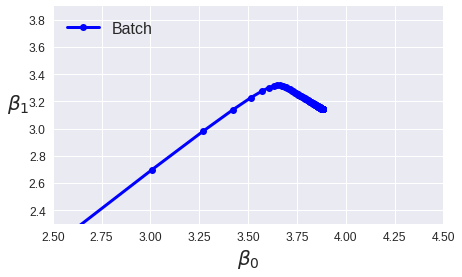

In [0]:
np.random.seed(42)
beta = np.random.randn(2,1)
eta = 0.1
n_iteracoes = 1000
beta_bgd = []

for iteracao in range(n_iteracoes):
    gradiente = 2/n * X_b.T.dot(X_b.dot(beta) - y)
    beta = beta - eta * gradiente
    beta_bgd.append(beta.ravel())

beta_bgd = np.array(beta_bgd)
plt.figure(figsize=(7,4))
plt.plot(beta_bgd[:,0], beta_bgd[:,1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\beta_0$", fontsize=20)
plt.ylabel(r"$\beta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Em seguida para o Stochastic Gradient Descent

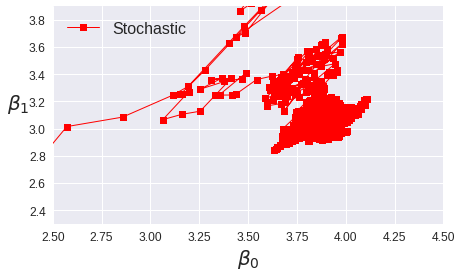

In [0]:
np.random.seed(42)
beta = np.random.randn(2,1)

n_epocas = 50
n = len(X_b)
t0, t1 = 5, 50

beta_sgd = []

for epoca in range(n_epocas):
  for i in range(n):
    linha_escolhida = np.random.randint(n)
    xi = X_b[linha_escolhida:linha_escolhida+1]
    yi = y[linha_escolhida:linha_escolhida+1]
    gradientes = 2 * xi.T.dot(xi.dot(beta) - yi)
    eta = t0 / (epoca * n + i + t1) # método de aprendizagem
    beta = beta - eta * gradientes
    beta_sgd.append(beta.ravel())

beta_sgd = np.array(beta_sgd)
plt.figure(figsize=(7,4))
plt.plot(beta_sgd[:,0], beta_sgd[:,1], "r-s", linewidth=1, label="Stochastic")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\beta_0$", fontsize=20)
plt.ylabel(r"$\beta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

E por último para o Mini-batch

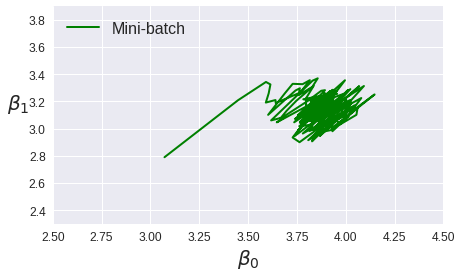

In [0]:
np.random.seed(42)
beta = np.random.randn(2,1)

n_epocas = 50
n = len(X_b)
t0, t1 = 200, 1000
tamanho_minibatch = 20

beta_mgd = []

t = 0
for epoca in range(n_epocas):
  indices_misturados = np.random.permutation(n)
  X_b_misturado = X_b[indices_misturados]
  y_misturado = y[indices_misturados]
  for i in range(0,n,tamanho_minibatch):
    linha_escolhida = np.random.randint(n)
    xi = X_b_misturado[linha_escolhida:linha_escolhida+tamanho_minibatch]
    yi = y_misturado[linha_escolhida:linha_escolhida+tamanho_minibatch]
    gradientes = 2 / tamanho_minibatch * xi.T.dot(xi.dot(beta) - yi)
    eta = t0 / (t + t1) # método de aprendizagem
    beta = beta - eta * gradientes
    beta_mgd.append(beta.ravel())
    t += 1

beta_mgd = np.array(beta_mgd)
plt.figure(figsize=(7,4))
plt.plot(beta_mgd[:,0], beta_mgd[:,1], "g-+", linewidth=2, label="Mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\beta_0$", fontsize=20)
plt.ylabel(r"$\beta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Vamos aproveitar os arrays onde estão armazenados os $\beta$s e criar um gráfico sobreposto

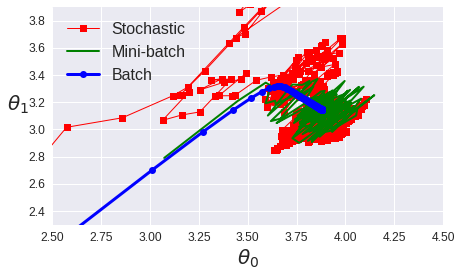

In [0]:
plt.figure(figsize=(7,4))
plt.plot(beta_sgd[:, 0], beta_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(beta_mgd[:, 0], beta_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(beta_bgd[:, 0], beta_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Regressão Polinomial

In [0]:
import numpy as np
np.random.seed(42)

Vamos criar um par de arrays X e y que possuem uma relação não-linear, neste caso quadrática, entre si.

In [0]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Em seguida vamos apresentar esta relação em forma gráfica, através de uma dispersão.

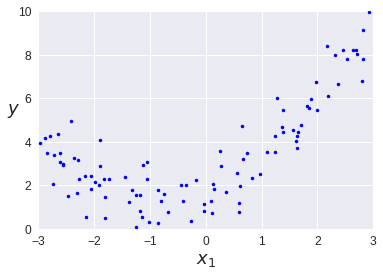

In [0]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Vamos efetuar o ajuste, através do scikit-learn. Importamos a classe `PolynomialFeatures` a qual permite ajuste polinomial.

Criamos em seguida um objeto da classe `PolynomialFeatures` e indicamos `degree=2` para informar que faremos um ajuste por função quadrática. `degree=3` faria um ajuste por cúbica e assim por diante. `include_bias=False` indica que não desejamos criar também uma coluna com o termo independente (valor constante).

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

Observe a seguir a diferença entre X[0] e X_poly[0]. X[0] é o primeiro elemento do array original.

In [0]:
X[0]

array([-0.75275929])

Já X_poly[0] contém o valor original e o seu quadrado.

In [0]:
X_poly[0]

array([-0.75275929,  0.56664654])

Vamos agora ajustar um modelo de regressão linear em X_poly e obter os valores do intercepto e dos coeficientes do modelo que irá ajustar os dados à seguinte expressão: $y=\beta_0+\beta_1 x + \beta_2 x^2$. 

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Os dados originais foram obtidos da expressão $y = 0.5{x_1}^2+1.0x_1+2.0+\epsilon$

O modelo ajustado indicou: $y=0.56{x_1}^2+0.93{x_1}+1.78$ o que é muito próximo dos valores originais.

Vamos mostrar agora um gráfico com a dispersão e a parábola do modelo de ajuste. 

Primeiro criamos um array2D (100,1) com uma 100 valores de x, igualmente espaçados entre -3 e 3. Apresentaremos em seguida os 5 primeiros valores de X_new

In [0]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new[:5]

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576]])

O próximo passo é gerar um array2D (100,2) o qual irá conter os valores originais de x e os seus quadrados.

In [0]:
X_new_poly = poly_features.transform(X_new)
X_new_poly[:5]

array([[-3.        ,  9.        ],
       [-2.93939394,  8.64003673],
       [-2.87878788,  8.28741965],
       [-2.81818182,  7.94214876],
       [-2.75757576,  7.60422406]])

Lembrando, lin_reg é o objeto da classe LinearRegression que utilizamos para ajustar os dados ao nosso modelo de regressão polinomial quadrática.

Vamos utilizar de lin_reg o método `.predict` para obter as previsões de y a partir dos novos valores de X, já transformados para um array2D (100x2). Observe que `y_new` é um array2D (100x1)

In [0]:
y_new = lin_reg.predict(X_new_poly)
y_new[:5,0]

array([4.06140272, 3.9147669 , 3.77227847, 3.63393742, 3.49974376])

E agora vamos desenhar o gráfico do modelo sobreposto à dispersão dos dados originais.

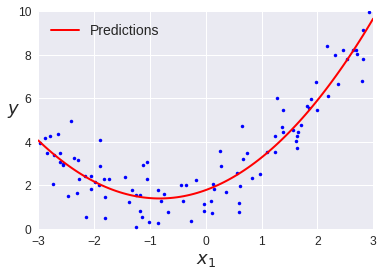

In [0]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

**Obs.**: Se estamos diante de uma regressão múltipla com duas variáveis independentes $x_1$ e $x_2$ por exemplo, `PolinomialFeatures` com `degree=2` irá ajustar também os termos cruzados (neste caso apenas um $x_1.x_2$).

O modelo ficaria portanto: $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 {x_1}^2 + \beta_4 {x_2}^2 + \beta_5 {x_1 x_2}$ 

No caso de duas variáveis independentes (duas features) $x_1$ e $x_2$ e um ajuste de grau 3 (`degree=3`) o modelo ficaria: $$y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 {x_1}^2 + \beta_4 {x_2}^2 + \beta_5 {x_1 x_2} + \beta_6 {x_1}^3 + \beta_7 {x_2}^3 +  + \beta_8 {x_1}^2{x_2}+ \beta_9 {x_1}{x_2}^2 $$ 

Vamos comparar agora três modelos: um linear, o qual irá subajustar os dados (*underfit*), outro o modelo quadrático e um polinomial de ordem 300 o qual irá sobreajustar os dados (*overfit*)

Para criar os modelos vamos incluir uma funcionalidade de preprocessamento do scikit-learn, `StandardScaler` a qual irá padronizar os dados. Para lembrar, padronização de dados é diminuir da média e dividir pelo desvio padrão.

In [0]:
from sklearn.preprocessing import StandardScaler

A seguir vamos incluir o outro recurso do scikit-learn denominado `Pipeline` o qual facilita a aplicação de um conjunto de transformações aos dados. 

In [0]:
from sklearn.pipeline import Pipeline

Para compreender o uso de um `Pipeline` vamos primeiro ajustar novamente o modelo linear através de um pipeline 

O nosso pipeline será composto de três partes. 

Na primeira teremos um objeto da classe `PolynomialFeatures` o qual irá criar um array2D com o número de colunas adequado ao grau do polinômio de ajuste, no caso o grau é 1.

In [0]:
polinomio = PolynomialFeatures(degree=1, include_bias=False)

Em seguida uma padronização nos dados de entrada, ajustando média e desvio padrão nos valores de X. Esta padronização será obtida com um objeto do tipo `StandardScaler`

In [0]:
padronizador = StandardScaler()

E por último a criação do modelo de regressão linear propriamente dito. Este modelo será criado através de um objeto do tipo `LinearRegression`

In [0]:
modelo = LinearRegression()

As três tarefas serão então condensadas em um objeto do tipo `Pipeline`. Observe que indicamos os objetos de transformação e modelo que foram criados com um nome associado. 

In [0]:
regressao_polinomial = Pipeline([
        ("poly_features", polinomio),
        ("std_scaler", padronizador),
        ("lin_reg", modelo),
    ])

Para utilizar o pipeline basta passar os dois arrays com os dados originais ao Pipeline, através do método `.fit`. As transformações serão aplicadas e o modelo será criado de forma automática.

In [0]:
regressao_polinomial.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Uma vez ajustado, podem ser obtidas previsões para novos valores de entrada através do método `.predict`

In [0]:
X_new = np.linspace(-3,3,100).reshape(100,1)
y_newbig = regressao_polinomial.predict(X_new)
y_newbig[:5,0]

array([1.03315352, 1.08428204, 1.13541056, 1.18653909, 1.23766761])

Vamos agora utilizar a estrutura de loops do Python (a qual é do tipo `for each`) para gerar os modelos de grau 300, 2 e 1 

In [0]:
X_new = np.linspace(-3,3,100).reshape(100,1)
for grau in [300, 2, 1]:
  polinomio = PolynomialFeatures(degree=grau, include_bias=False)
  padronizador = StandardScaler()
  modelo = LinearRegression()
  regressao_polinomial = Pipeline([
          ("poly_features", polinomio),
          ("std_scaler", padronizador),
          ("lin_reg", modelo),
      ])
  regressao_polinomial.fit(X, y)
  y_newbig = regressao_polinomial.predict(X_new)
  print(y_newbig[:4,0])

[ 4.71149741e+14 -5.68644350e+11 -7.45844733e+07 -3.08724904e+06]
[4.06140272 3.9147669  3.77227847 3.63393742]
[1.03315352 1.08428204 1.13541056 1.18653909]


Como temos três modelos vamos aproveitar a estrutura dos loops do Python, a qual pode trabalhar com variáveis de loop "em paralelo" e gerar três gráficos mostrando os diferentes ajustes dos modelos

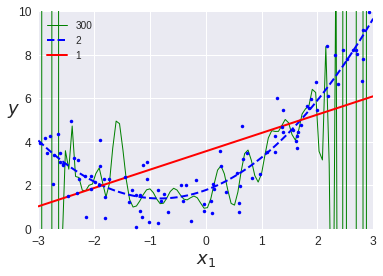

In [0]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Uma abordagem para diferenciar modelos que subajustam daqueles que sobreajustam os dados é utilizar o conceito de *curvas de aprendizado*. Nelas você compara o erro tanto no conjunto de treino quanto no de teste ou validação a medida que aumentamos o número de elementos tanto no treino quanto no teste.

A seguir é apresentado um código que gera as curvas, dado um determinado modelo e um conjunto de dados de entrada e saida.

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

Vamos olhar agora as curvas de aprendizado para o modelo linear. Observe que elas ficam próximas mas em um valor alto. Esta é a característica dos modelos com subajuste.

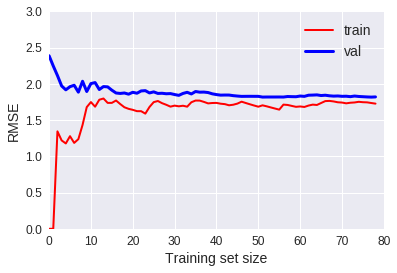

In [0]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()                                      

No caso a seguir são apresentadas as curvas para um modelo polinomial de ordem 10. Observe que a curva do conjunto de teste permanece acima da do conjunto de treino e com uma distância considerável entre elas. Esta é a característica dos modelos com sobreajuste.

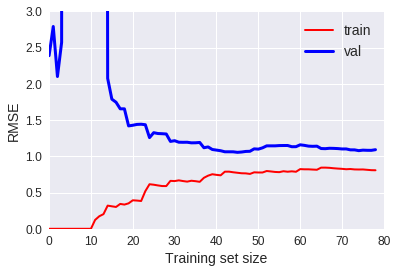

In [0]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

Por último vamos gerar a curva para o modelo polinomial de ordem 2. Observe que a curva de erro no conjunto de teste fica estável e um pouco acima da curva no conjunto de treino. Esta é a característica dos modelos bem ajustados.

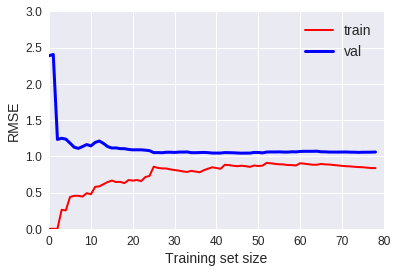

In [0]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

# Modelos Regularizados (pular em um primeiro curso)

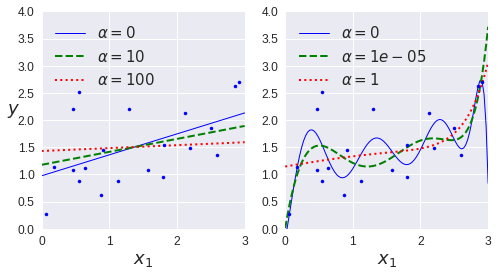

In [0]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [0]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [0]:
import math
#Foi incluido o parametro tol = -math.inf para evitar uma future warning
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42, tol = -math.inf)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13500145])

In [0]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

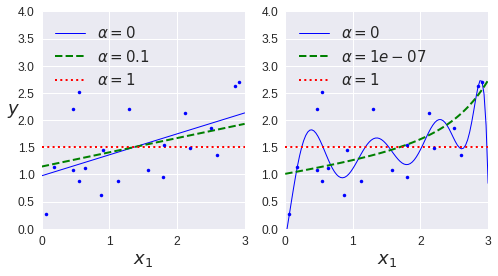

In [0]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [0]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [0]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

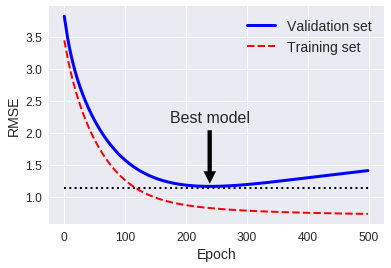

In [0]:
import math
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Foi incluido tol = -math.inf para evitar uma future warning
sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42,
                       tol = -math.inf)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [0]:
import math
from sklearn.base import clone
#Foi incluido o parâmetro tol = -math.inf para evitar uma future warning
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42,
                       tol = -math.inf)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [0]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
        verbose=0, warm_start=True))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [0]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

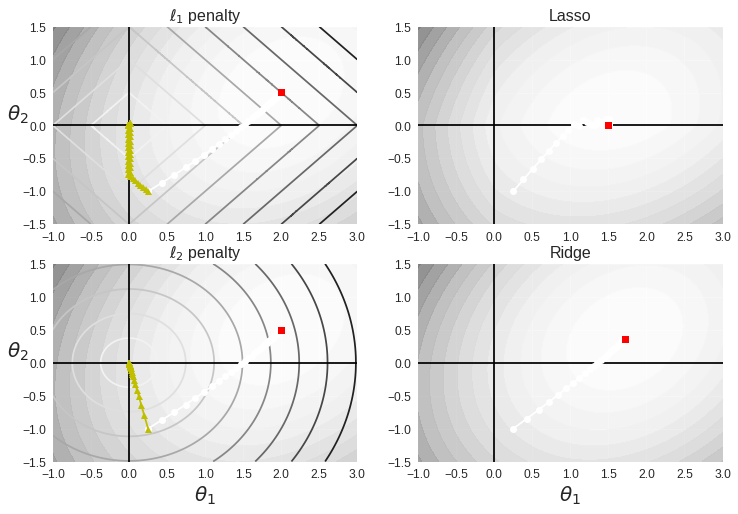

In [0]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

# Regressão Logística

A regressão logística é utilizada para prever a probabilidade de ocorrência de um determinado evento. Sendo assim, a variável de saida deve ser do tipo binomial (isto é podendo assumir apenas valores 0 ou 1). As variáveis de entrada podem ser tanto do tipo binomial (0 ou 1), multinomial (quando podem assumir vários valores discretos, tipo 0, 1, 2, 3, etc...) ou contínuo.

O procedimento de cálculo é explicado a seguir. Primeiro, tal como na regressão linear, é calculada uma ponderação dos valores das variáveis de entrada do modelo, através da expressão: $\mathbf{x}^t \mathbf{\beta}$ ou $\beta^t \mathbf{x}$. Vale lembrar que esta expressão terá como resultado um número único (um escalar).

Em seguida esta ponderação é aplicada na chamada função logística, aqui representada por $\sigma$, obtendo-se como resultado a probabilidade de ocorrer (isto é ser 1) o valor da variável de saida $y$ em função dos valores das variáveis de entrada $x_1 ... x_n$, o que representamos por: $p(y=1 | \mathbf{x}) = \sigma(\mathbf{z}^t \beta)$

## Função Logística

A função logística $\sigma$ por sua vez é dada pela expressão $\sigma(x) = \frac{1}{1+e^{-x}}$. O gráfico desta função é montado passo a passo a seguir. Percebe-se claramente que ela mapeia qualquer valor de x no intervalo $-\infty $ até $+\infty$ para o intervalo 0 a 1.

Carregamos as bibliotecas

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Inserimos os valores do eixo dos x

In [0]:
t = np.linspace(-10, 10, 100)
t[list(range(0,2))+list(range(98,100))]

array([-10.       ,  -9.7979798,   9.7979798,  10.       ])

Geramos os valores da função sigmóide (eixo dos y)

In [0]:
sig = 1 / (1 + np.exp(-t))

Definimos o tamanho do gráfico

In [0]:
plt.figure(figsize=(9, 3))
plt.show()

<Figure size 648x216 with 0 Axes>

Inserimos uma linha horizontal em negrito ("k-"), indo de (-10,0) até (10,0) 

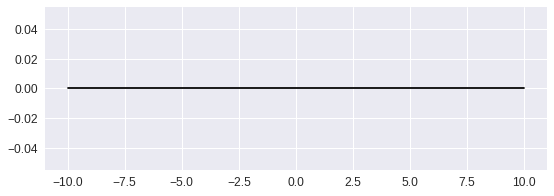

In [0]:
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.show()

Inserimos outra linha, neste caso pontilhada ("k:") indo de (-10,0.5) até (10,0.5)

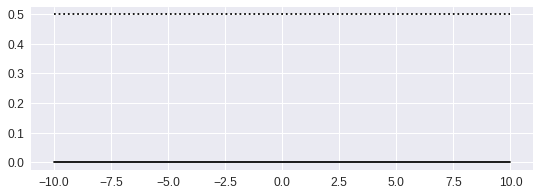

In [0]:
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.show()

Colocamos uma terceira linha pontilhada ("k:") desta vez indo de (-10,1) até (10,1)

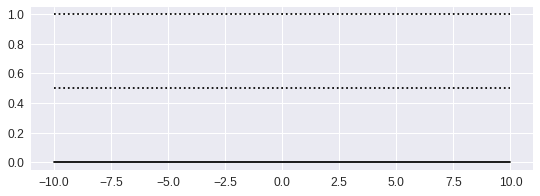

In [0]:
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.show()

Colocamos uma quarta linha, continua, em negrito ("k-"), indo de (0,-1.1) até (0,1.1)

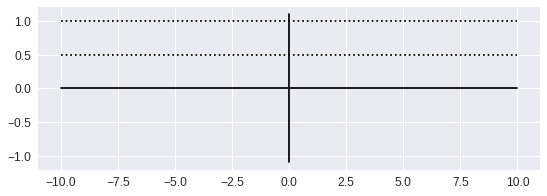

In [0]:
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.show()

Inserimos a sigmoide, o array `t` é colocado no eixo dos `x`, o array `sig` no eixo dos `y`, largura da linha (`linewidth`) igual a 2, cor azul, linha continua (`"b-"`) e criamos (porém ainda não é apresentado) o label da curva, a saber: $\sigma(t) = \frac{1}{1 + e^{-t}}$

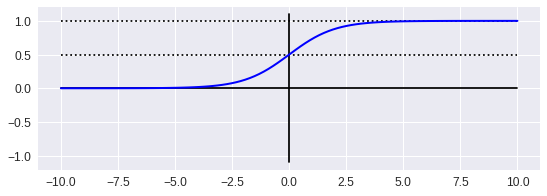

In [0]:
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.show()

Inserimos o label do eixo dos x o qual neste caso será `t`

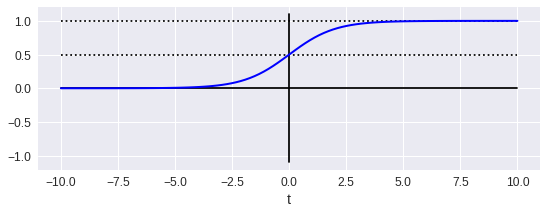

In [0]:
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.show()

E apresentamos o label do gráfico com a definição da função sigmóide.

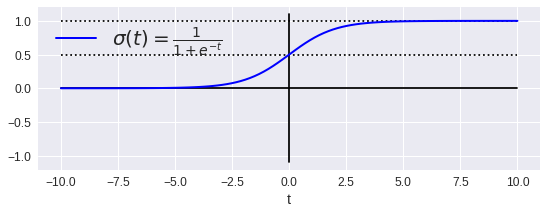

In [0]:
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.show()

Para eliminar a parte negativa do gráfico, indicamos que os eixos irão de (-10,-0.1) (canto inferior esquerdo) até (10, 1.1) (canto superior direito)

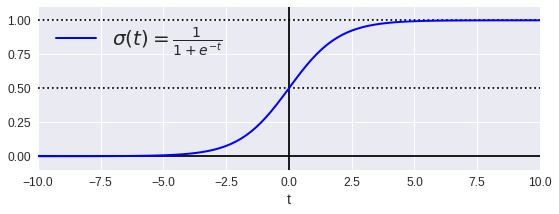

In [0]:
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Função Custo na Regressão Logística

Vamos agora entender como é feito o cálculo do custo na regressão logística (similar ao RME na linear) e do gradiente deste custo.

A probabilidade $p$ da variável de saida $y$ ser 1 é o próprio resultado da função logística $\sigma$ para o valor de entrada ponderado das variáveis independentes dado por $\mathbf{x}^t \beta$. A probabilidade de $y$ ser 0 é dada por $1-p$. Sendo assim, dizemos de maneira formal que: 

$$ p = p(y=1) = \sigma(\mathbf{x}^t \beta)$$

$$ 1-p = p(y=0) = 1-\sigma (\mathbf{x}^t \beta )$$

A função custo associada aos valores de $\beta$ será definida como: $$ c(\beta)=
\begin{array}{c}
-log(p)  \text{ se }  y=1 \\\
-log(1-p) \text{ se } y=0
\end{array}
$$ 

Para entender a função custo, se y=1 queremos valores altos de $p$, isto é próximos de 1. Logo $-log(p)$ será positivo e próximo de 0, pois $log(1)=0$. Ou seja o seu custo será baixo. Ao contrário se forem atribuidos valores baixos de $p$ quando $y=1$ seu custo será alto pois $-log(p)$ se aproxima de $\infty$ a medida que $p$ tende para 0.

O inverso ocorre quando y=0. Neste caso queremos valores baixos de $p$. Sendo assim teremos valores próximos de 1 para $1-p$ e o custo associado será portanto baixo. Se for atribuido um valor alto para $p$ teremos valores próximos de 0 para $1-p$ o que fará $-log(1-p)$ se tornar alto.

Para obter a função de custo total do vetor de parâmetros $\beta$ somamos todas as instâncias de $\mathbf{x}$ e $\mathbf{y}$ e dividimos pelo número total de instâncias $n$. A fórmula da função custo total fica então: $$J(\beta) = -\frac{1}{n} \sum_{i=1}^n y_ilog(p_i(\beta))+(1-y_i)log(1-p_i(\beta)) $$ 

Como $y_i$ ou é 0 ou é 1 se o valor de $y_i$ for 1, sobra apenas o primeiro termo no somatório e se o valor for 0 sobrará apenas o segundo termo. Ao contrário da regressão linear não há forma fechada para o vetor $\vec{\beta})$, porém a função é convexa, tendo portanto convergência garantida se for aplicado um método de gradiente para obtenção dos valores das componentes do vetor $\beta$.

O gradiente da função custo $J(\beta)$ é dado por: $$\nabla J(\beta) = \frac{1}{n}\sum_{i=1}^n (\sigma(\beta^t.\mathbf{x}^i)-y^i)\mathbf{x}^i$$

Dada a maior complexidade da função custo no caso da regressão logística vamos implementar os exemplos diretamente através das funções do scikit-learn.

## Aplicação da Regressão Logística no conjunto de dados *íris*

Nestes exemplos vamos utilizar o dataset *iris* o qual já é clássico em treino e teste de algoritmos de classificação.

Observe que o dataset `iris` é na verdade um dicionário com as chaves apresentadas a seguir

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

O primeiro elemento é um array numpy o qual contém os valores das variáveis independentes do conjunto de dados íris propriamente dito (Petal Length, Petal Width, Sepal Length, Sepal Width).

In [0]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

O segundo são os valores (numéricos) da variável dependente (0, 1 e 2), isto é a classificação por espécie (Setosa, Versicolor, Virginica).

In [0]:
iris.target[:5]

array([0, 0, 0, 0, 0])

Nos valores associados à chave `target_names` temos os nomes das espécies associados aos códigos 0, 1 e 2.

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Na chave `feature_names` estão os nomes associados aos valores presentes na chave `data`

In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Nome e localização do arquivo onde os dados foram gravados

In [0]:
iris.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

Descrição do dataset compelto

In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Neste exemplo queremos criar um modelo de regressão logística que indique a partir da feature "petal width" se a planta é da espécie Virginica ou não.

Para obter os valores de `petal width` primeiro listamos os valores na chave `data` do dicionário `iris`.  Isto é feito por `iris["data"]`

Lembrando iris["feature_names"] indicou 4 nomes de colunas, os quais são repetidos a seguir

In [0]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

`iris["data"]` é um array2D. Para obter os valores de `petal width` precisamos dos elementos da quarta coluna (a qual possui índice 3). Isto é obtido com `iris["data"][:,3:]`  O array resultante será 2D e (100x1). Utilizamos .reshape para mostrar alguns valores em um formato mais conveniente.

In [0]:
X = iris["data"][:, 3:]  # petal width
X[:5].reshape(1,5)

array([[0.2, 0.2, 0.2, 0.2, 0.2]])

Como variável dependente, queremos 1 se o `target_name` do valor for `virginica` e 0 caso contrário. 

In [0]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

O valor correspondente de `target` correspondente à `virginica` é 2. 

Se fizermos apenas `iris["target"]==2` teremos uma sequência de True e False (booleanos).

In [0]:
(iris["target"] == 2)[0:5]

array([False, False, False, False, False])

Para passar os valores booleanos para numérico inteiro utilizamos o método `.astype(np.int)`

In [0]:
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
y[:5]

array([0, 0, 0, 0, 0])

As matrizes com os valores da variável independente (`petal width`) X e da variável dependente (`virginica` ou `não virginica`) y estão montados. 

Vamos agora importar a classe LogisticRegression do módulo de modelos lineares do scikit-learn

In [0]:
from sklearn.linear_model import LogisticRegression

Uma vez importado o módulo, vamos criar um objeto do tipo LogisticRegression o qual será o nosso modelo de regressão logística (ainda genérico, sem os dados de ajuste)

In [0]:
#Foi incluida a opção solver='lbfgs' para evitar uma future warning
log_reg = LogisticRegression(random_state=42, solver='lbfgs')

A partir do objeto `log_reg` criado na célula acima, utilizamos o método `.fit` para passar os arrays com os valores das variáveis independente (X) e dependente (y) e ajustar o modelo aos dados.

In [0]:
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Vamos utilizar o modelo para, a partir de um conjunto de valores para `petal width` obter as probabilidades da categoria ser 1 (`virginica`) ou 0 (`não virginica`)

Primeiro geramos uma sequência de mil valores equidistantes entre sí, entre 0 e 3. A sequência seria um array 1D com 1.000 elementos, como pode ser confirmado a seguir

In [0]:
np.linspace(0,3,1000).shape

(1000,)

Uma vez que precisamos de um array 2D, (1000x1) como entrada para o modelo `log_reg` gerar as probabilidades, utilizamos o método `.reshape` para tornar o array 1D original em um array 2D, (1000x1)

O valor -1 em reshape indica que o array 2D resultante deverá ter "tantas linhas quantas sejam necessárias" para o reshape e uma coluna.

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

Com o array 2D `X_new` formatado, passamos o mesmo para o modelo `log_reg` através do método `.predict_proba` para obter as probabilidades associadas a cada valor de `petal width`

In [0]:
y_proba = log_reg.predict_proba(X_new)

Vamos agora traçar o gráfico das probabilidades associadas. Observe que o array resultante (`y_proba`) é do tipo (nx2).

In [0]:
y_proba[:5]

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       [9.99220183e-01, 7.79816732e-04],
       [9.99209978e-01, 7.90022153e-04]])

A coluna 0 tem as probabilidades da variável de saida se 0 ("não virginica") a partir do valor correspondente de `petal width`.

A coluna 1 tem as probabilidades da variável de saida se 1 ("virginica") a partir do valor correspondente de `petal width`.

Lembre-se que os valores da variável independente, no array X vão de 0 a 3. Logo para pequenos valores de `petal width` a probabilidade da instância (linha) ser `virginica` é baixa.

Vamos agora montar o gráfico associado

Primeiro criamos um gráfico com cor verde, linha continua (`"g-"`) e largura igual a 2 (`linewidth=2`), para no eixo dos x os valores de `X_new` e no eixo dos y os valores de `y_proba[:,1]`. O label que será apresentado depois será `Virginica`

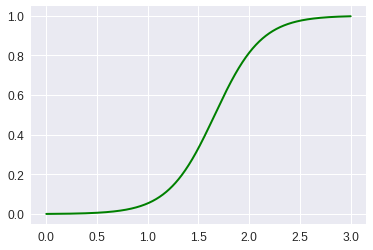

In [0]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.show()

Fazemos algo similar para os valores de `y_proba[:,0]`, neste caso com uma linha azul, tracejada ("b--"), de largura igual a 2 (`linewidth=2`) 

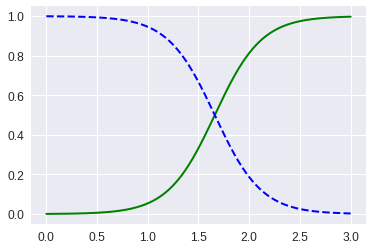

In [0]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.show()

E por último apresentamos as legendas no gráfico.

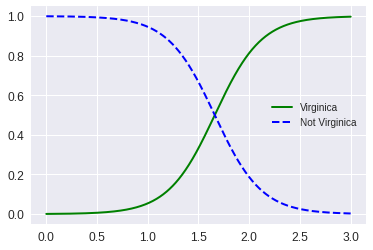

In [0]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.legend(loc='best')
plt.show()

## Fronteira de Decisão

A fronteira de decisão é o valor da variável independente (`petal width` neste caso) para o qual a probabilidade da variável de saida y ser 1 é de 50%, ou seja neste valor de variável de entrada não há valor preferencial entre 0 e 1 (para a variável de saida).

Para gerar um gráfico no qual poderemos visualizar a Fronteira de Decisão primeiro geramos os valores para o eixo dos X, como um array numpy 2D, (1000x1)

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

Em seguida utilizamos o modelo `log_reg` para gerar as previsões para a probabilidade da variável de saida (y) ser igual a 0 (na 1a coluna do array de saida, ou coluna 0) e igual 1 (na 2a coluna do array de saida, ou coluna 1)

In [0]:
y_proba = log_reg.predict_proba(X_new)

A fronteira de decisão é o valor de X para o qual a probabilidade de y ser 1 é 50%.

No entanto, por questões de aproximação numérica talvez não exista o valor exato, 50% no array de saida. Vamos então utilizar de um pequeno truque para obter o valor de X que representa a fronteira de decisão.

Iremos primeiro filtrar o array X_new, mantendo apenas os valores para os quais a probabilidade de y ser 1 for maior ou igual a 0.5. Apresentamos abaixo os 5 primeiros valores deste array "filtrado"

In [0]:
X_new[y_proba[:,1]>=0.5][:5]

array([[1.66066066],
       [1.66366366],
       [1.66666667],
       [1.66966967],
       [1.67267267]])

Vamos definir para o valor de X_new que será a fronteira de decisão como sendo o primeiro valor para o qual y_proba[:,1] é maior ou igual a 0.5. Este valor será o de índice 0 no vetor X_new.

In [0]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

Podemos confirmar a validade da fronteira de decisão, calculando a previsão do valor (não da probabilidade) para a variável y abaixo e acima do valor de X definido como fronteira de decisão. Um valor de X abaixo do valor de fronteira, irá gerar uma previsão de y = 0 e um valor acima, irá gerar y=1, conforme pode ser visto a seguir.

Observe que utilizamos o método `.predict` e não o método que vinha sendo utilizado até o momento `.predict_proba`, pois agora queremos a categoria mais provável para y e não a probabilidade de y ser 0 ou a probabilidade de y ser 1.

In [0]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Vamos agora ao gráfico associado

Definimos o tamanho

In [0]:
plt.figure(figsize=(8, 3))
plt.show()

<Figure size 576x216 with 0 Axes>

Indicamos a sequência de valores de X (originais) para os quais a variável y é 0 e desenhamos os mesmos em pequenos quadrados azuis ("bs")

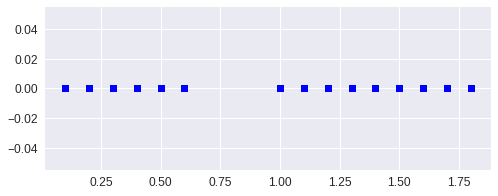

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.show()

Em seguida indicamos a sequência de valores de X (originais) para os quais a variável y é 1 e desenhamos os mesmos em pequenos triângulos verdes ("g^")

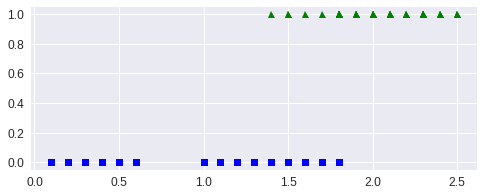

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.show()

O próximo passo é desenhar uma linha vertical para o valor de X da fronteira de decisão. Esta linha é desenhada entre os pontos (decision_boundary,-1) e (decision_boundary,2), em formato potilhado preto "k:", com largura igual a 2 (`linewidth=2`)

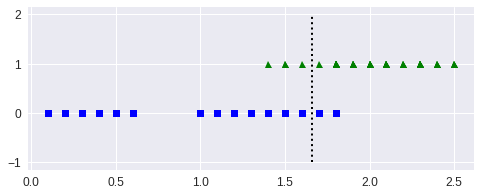

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.show()

Traçamos a curva da probabilidade da variável de saida y ser 1 (`y_proba[:,1]`) a partir dos valores da variável de entrada X_new. Neste caso não utilizamos os valores originais pois queremos uma curva continua. A curva terá cor verde, linha continua (`"g-"`), com largura igual a 2 (`linewidth=2`) e terá o label (ainda não apresentado de `Virginica`)

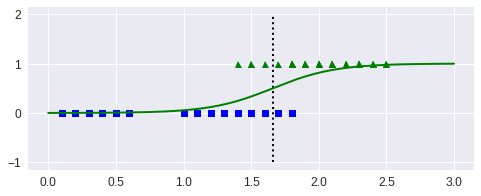

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.show()

Fazemos o mesmo para a probabilidade de y ser 0, `y_proba[:,0]`, desta vez com uma linha tracejada em azul (`b--`)

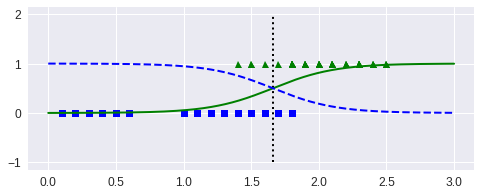

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.show()

Escrevemos a palavra `Decision boundary`na cor preta (`color="k"`), centralizando a mesma (`ha="center"`) na posição `(decision_boundary+0.02), 0.15)` com uma fonte de tamanho 14 (`fontsize=14`)

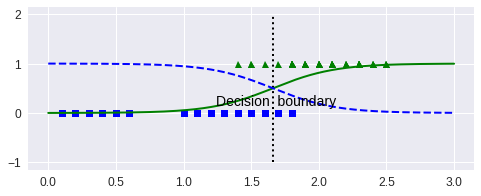

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.show()

Inserimos uma seta: a) com origem em (decision_boundary, 0.08), b) com comprimento 0,3 para a esquerda (-0.3) e c) inclinação em relação a horizontal de 0.

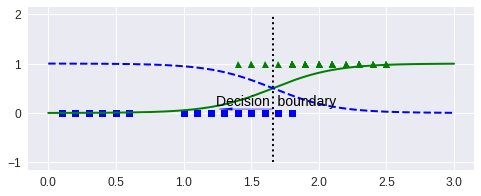

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.show()

Traçamos uma seta similar, em verde, para a direita, partindo de (decision_boundary, 0.92)

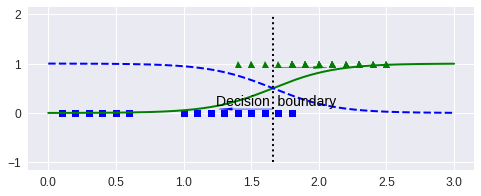

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.show()

Inserimos o label para o eixo dos x

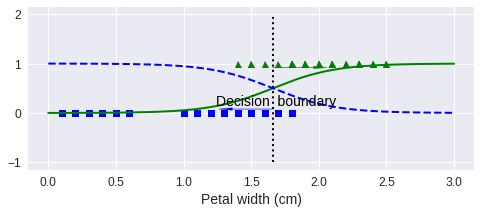

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.show()

Em seguida o label para o eixo dos y

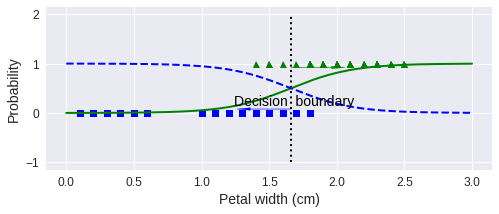

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.show()

Apresentamos as legendas relativas às curvas

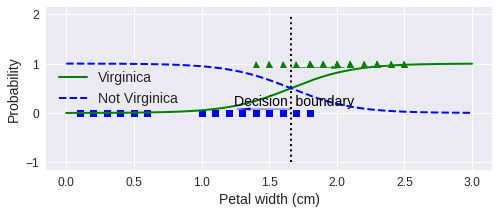

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

E por último definimos o posicionamento dos eixos para apresentação final do gráfico

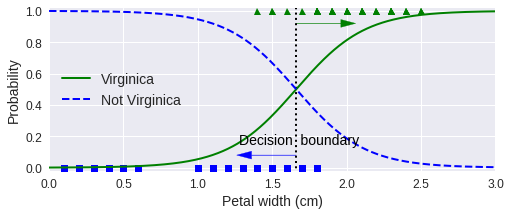

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

## Fronteiras de Decisão

A fronteira de decisão traçada acima ocorreu para o valor de X para o qual a probabilidade de y "cruzou" o valor de 50%. 

Como o gráfico tinha apenas uma variável independente a fronteira se tornou uma reta na vertical.

Vamos agora gerar um modelo de previsão tomando por base duas variáveis de entrada `petal length` e `petal width`

Vamos agora traçar esta reta (na qual P(y=1)=50%) mas em um gráfico de dispersão, no qual no eixo dos x teremos os valores de `petal length` e no eixo dos y os valores de `petal width` (justamente as variáveis independentes do nosso novo modelo).

Primeiro importamos a classe `LogisticRegression` do módulo `linear_model` do `scikit-learn` para iniciar o desenvolvimento do novo modelo de previsão.

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression

Em seguida formamos o vetor das variáveis independentes X carregando a terceira e quarta colunas (índices 2 e 3), da chave "data" do dicionário "iris", as quais contém os valores de `petal length` e `petal width`.

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, (2, 3)]  # petal length, petal width

A variável de saida y continua a mesma, pois continuamos a querer prever se, dado um conjunto de valores para as variáveis de entrada, a variável de saida será classificada como `Virginica` ou `Não Virginica`

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, (2, 3)]  # petal length, petal width

y = (iris["target"] == 2).astype(np.int)

Criamos um novo objeto do tipo `LogisticRegression`. Este objeto terá um hiperparâmetro `C`, o qual irá tornar a banda limite de previsão mais ou menos larga. Quanto maior o `C`, mais estreita será a banda de previsão. Maiores detalhes a respeito deste parâmetro serão apresentados na aula sobre Support Vector Machines.

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, (2, 3)]  # petal length, petal width

y = (iris["target"] == 2).astype(np.int)

#Foi incluida a opção solver='lbfgs' para evitar uma future warning
log_reg = LogisticRegression(C=10**10, random_state=42, solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

Como agora temos duas variáveis de entrada (independentes) no modelo precisamos gerar uma tabela de combinações possíveis para os valores de cada uma delas (aqui denominadas de x0 e x1.)

Isto é feito com a função numpy `meshgrid`. Temos de passar dois arrays 2D, cada um com uma quantidade de linhas qualquer, porém ambos com uma coluna apenas. A função `meshgrid` vai combinar cada valor de um dos arrays com todos os valores do outro array formando um quadriculado de pontos no plano (um grid)

Para entender a função `meshgrid` observe os exemplos a seguir, com um pequeno número de pontos

In [0]:
np.linspace(0,5,6).reshape(-1,1)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [0]:
np.linspace(-6,-1,6).reshape(-1,1)

array([[-6.],
       [-5.],
       [-4.],
       [-3.],
       [-2.],
       [-1.]])

In [0]:
x0, x1 = np.meshgrid(
   np.linspace(0,5,6).reshape(-1,1),
   np.linspace(-5,-1,5).reshape(-1,1))

x0 é constante nas colunas

In [0]:
x0

array([[0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.]])

x1 por sua vez será constante nas linhas

In [0]:
x1

array([[-5., -5., -5., -5., -5., -5.],
       [-4., -4., -4., -4., -4., -4.],
       [-3., -3., -3., -3., -3., -3.],
       [-2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1.]])

Tornando cada um dos arrays em uma sequência 1D

In [0]:
x0.ravel()

array([0., 1., 2., 3., 4., 5., 0., 1., 2., 3., 4., 5., 0., 1., 2., 3., 4.,
       5., 0., 1., 2., 3., 4., 5., 0., 1., 2., 3., 4., 5.])

In [0]:
x1.ravel()

array([-5., -5., -5., -5., -5., -5., -4., -4., -4., -4., -4., -4., -3.,
       -3., -3., -3., -3., -3., -2., -2., -2., -2., -2., -2., -1., -1.,
       -1., -1., -1., -1.])

Podemos agora gerar todas as combinações (o grid) de valores de x0 e x1, aos pares.

In [0]:
np.c_[x0.ravel(),x1.ravel()][:5]

array([[ 0., -5.],
       [ 1., -5.],
       [ 2., -5.],
       [ 3., -5.],
       [ 4., -5.]])

Gerando o grid para o problema

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, (2, 3)]  # petal length, petal width

y = (iris["target"] == 2).astype(np.int)

#Foi incluida a opção solver='lbfgs' para evitar uma future warning
log_reg = LogisticRegression(C=10**10, random_state=42, solver='lbfgs')
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

Gerando os pares ordenados

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, (2, 3)]  # petal length, petal width

y = (iris["target"] == 2).astype(np.int)

#Foi incluida a opção solver='lbfgs' para evitar uma future warning
log_reg = LogisticRegression(C=10**10, random_state=42, solver='lbfgs')
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

Aplicando o conjunto de pontos no modelo de regressão logística

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, (2, 3)]  # petal length, petal width

y = (iris["target"] == 2).astype(np.int)

#Foi incluida a opção solver='lbfgs' para evitar uma future warning
log_reg = LogisticRegression(C=10**10, random_state=42, solver='lbfgs')
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

Gerando o gráfico passo a passo. 1o definindo o tamanho da área de desenho.

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 4))
plt.show()

<Figure size 720x288 with 0 Axes>

Inserindo os pontos que originalmente foram marcados como 'Não Virginica' X[y==0,], nas dimensões `Petal Length`(X[y==0,,0]) e `Petal Width` (X[y==0,1]) em pequenos quadrados azuis ("bs")

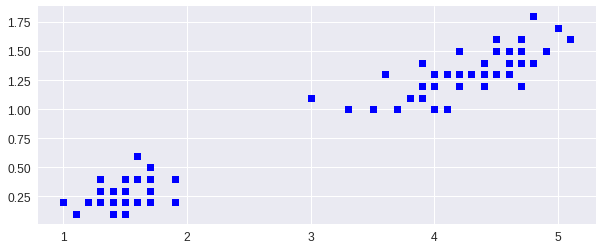

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.show()

Inserindo os pontos que originalmente foram marcados como 'Virginica' X[y==1,], nas dimensões `Petal Length`(X[y==0,,0]) e `Petal Width` (X[y==0,1]) em pequenos triângulos verdes ("g^")

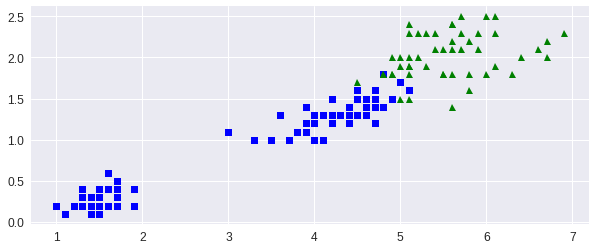

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.show()

Gerando as linhas de fronteira para diferentes probabilidades

O resultado da função log_reg.predict_proba foi armazenado no array y_proba (vide célula acima com a expressão: `y_proba = log_reg.predict_proba(X_new)`). Como pode ser visto a seguir, o resultado tem o formato de um array 2D (100000 x 2). 

As 100.000 linhas representam cada uma uma combinação dos pontos no grid. 

In [0]:
y_proba.shape

(100000, 2)

Vamos reformatar este conjunto para refletir a disposição orginial de x0 e x1. 

In [0]:
x0.shape

((200, 500), array([9.99999998e-01, 1.72223501e-09]))

E isto será obtido com a expressão a seguir:

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)

Para gerar as linhas de contorno acrescentamos a expressão de um gráfico do tipo `contour`

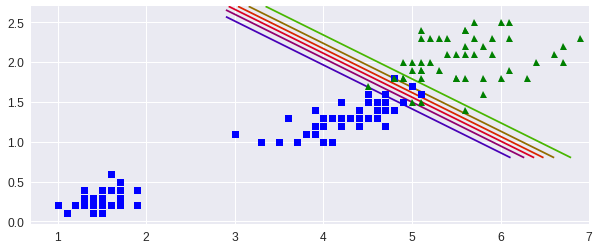

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

plt.show()

Calculando as probabilidades correspondentes a cada linha de fronteira

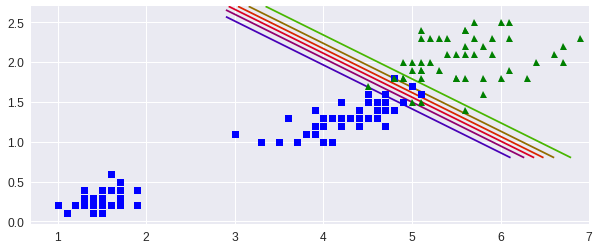

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

Inserindo o valor das probabilidades de cada linha de fronteira

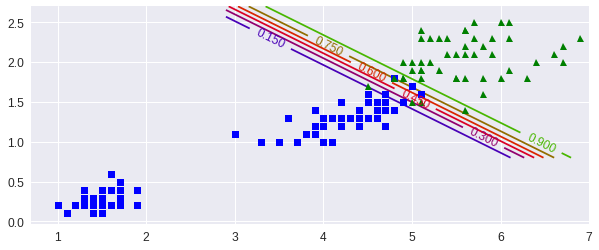

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.show()

Inserindo a linha de 50% em tracejado

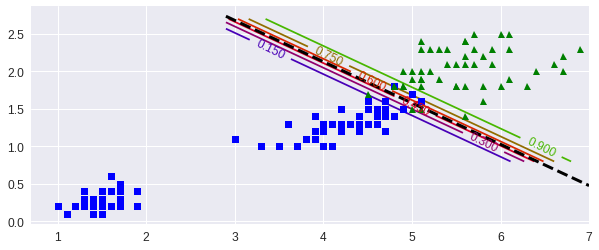

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.show()

Marcando os azuis como "Não Virginica"

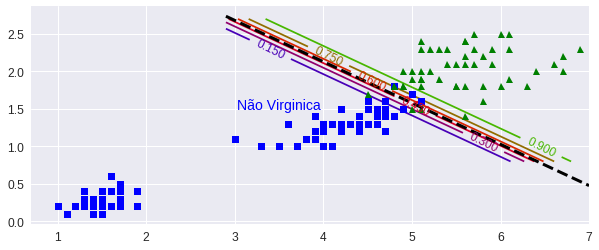

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Não Virginica", fontsize=14, color="b", ha="center")
plt.show()

Marcando os verdes como Virginica

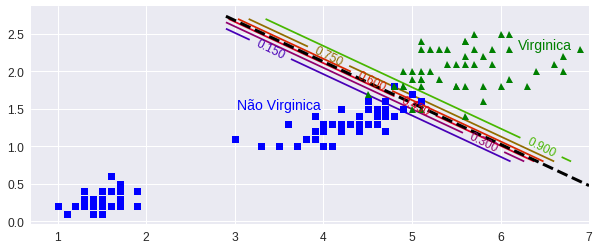

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Não Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Virginica", fontsize=14, color="g", ha="center")
plt.show()

Inserindo o label no eixo dos x como Petal Length

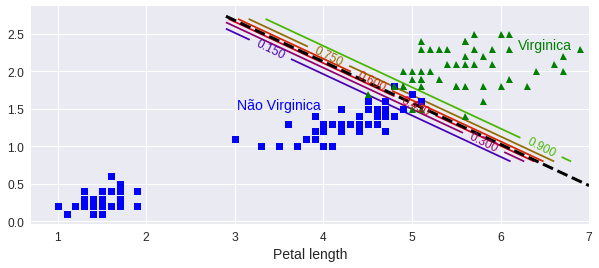

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Não Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.show()

Inserindo o label no eixo dos y como Petal Width

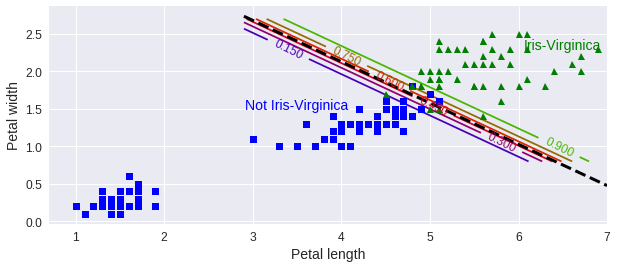

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.show()

Alterando o posicionamento dos eixos

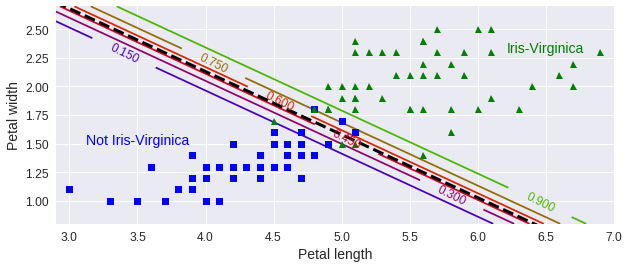

In [0]:

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Regressão Logística Multinomial - Algoritmo Softmax

In [0]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

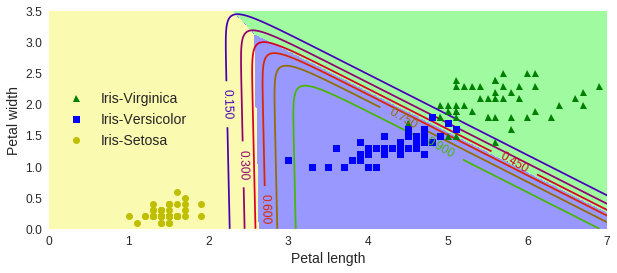

In [0]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [0]:
softmax_reg.predict([[5, 2]])

array([2])

In [0]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercício

## Batch Gradient Descent com parada antecipada aplicado à Regressão Softmax
(sem utilizar os recursos do Scikit-Learn)


Vamos começar carregando os dados. Vamos apenas reutilizar o conjunto de dados Iris que carregamos anteriormente.

In [0]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

Precisamos incluir o termos constante para todas as instâncias em que ($x_0 = 1$):

In [0]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

E vamos ajustar a semente de geração de números aleatórios para obter resultados constantes ao longo das diversas execuções do modelo:

In [0]:
np.random.seed(2042)

A opção mais fácil de dividir o conjunto de dados em um conjunto de treinamento, um conjunto de validação e um conjunto de testes seria usar a função `train_test_split ()` do Scikit-Learn, mas o objetivo deste exercício é tentar entender os algoritmos implementando-os manualmente. Então, aqui está uma implementação possível:

In [0]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

As variáveis a serem previstas são atualmente os índices de classe (0, 1 ou 2), mas precisamos das probabilidades das variáveis de decisão para treinar o modelo de regressão Softmax. Cada instância terá probabilidades iguais a 0.0 para todas as classes, exceto para a classe de destino que terá uma probabilidade de 1.0 (em outras palavras, o vetor de probabilidades de classe para uma determinada instância é um vetor composto de variáveis *dummy*). Vamos escrever uma pequena função para converter o vetor de índices de classe em uma matriz contendo um vetor de variáveis *dummy* para cada instância:

In [0]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Testando esta função nas 10 primeiras instâncias:

In [0]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [0]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Parece bom, então vamos criar a matriz de probabilidades da classe alvo para o conjunto de treinamento e o conjunto de testes:

In [0]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Agora vamos implementar a função Softmax. Lembre-se de que ela é definida pela seguinte equação:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [0]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

Estamos quase prontos para começar o treinamento. Vamos definir o número de entradas e saídas:

In [0]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Agora vem a parte mais difícil: treinar! Teoricamente, é simples: é só uma questão de traduzir as equações matemáticas em código Python. Mas, na prática, pode ser bastante complicado: em particular, é fácil misturar a ordem dos termos, ou os índices. Você pode até acabar com o código que parece estar funcionando, mas na verdade não está computando exatamente a coisa certa. Quando não tiver certeza, você deve anotar a forma de cada termo na equação e certificar-se de que os termos correspondentes em seu código correspondam bem. Também pode ajudar a avaliar cada termo independentemente e imprimi-los. A boa notícia é que você não terá que fazer isso todos os dias, já que tudo isso é bem implementado pelo Scikit-Learn, mas ajudará você a entender o que está acontecendo sob o capô.

Então as equações que precisaremos são a função custo:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

E a equação para os gradientes:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Observe que $\log\left(\hat{p}_k^{(i)}\right)$ poderá não ser computável se $\hat{p}_k^{(i)} = 0$. Então acrescentaremos um pequeno valor $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ para evitar que venhamos a obter valores `nan`.

In [0]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.42786510939287936
4500 0.41060071429187134
5000 0.3956780375390374


E é isso! O modelo Softmax está treinado. Vamos ver os parâmetros do modelo:

In [0]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Vamos fazer previsões para o conjunto de validação e verificar a pontuação de precisão:

In [0]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Bem, esse modelo parece muito bom. Para o exercício, vamos adicionar um pouco de $ \ell_2 $ regularização. O código de treinamento a seguir é semelhante ao código acima, mas a perda agora tem uma penalidade adicional de $ \ell_2 $, e os gradientes têm o termo adicional apropriado (note que não regularizamos o primeiro elemento de `Theta` porque isso corresponde ao termo de polarização). Além disso, vamos tentar aumentar a taxa de aprendizado `eta`.

In [0]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.48886433374493027
5000 0.48884031207388184


Por causa da penalidade adicional de $ \ell_2 $, a perda parece maior do que antes, mas talvez esse modelo tenha um desempenho melhor? Vamos descobrir:

In [0]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Precisão legal e perfeita! Nós provavelmente tivemos sorte com este conjunto de validação, mas ainda assim é agradável.

Agora vamos adicionar a parada antecipada. Para isso, precisamos apenas medir a perda no conjunto de validação em cada iteração e parar quando o erro começar a crescer.

In [0]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580261
2000 0.5331959249285545
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


In [0]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Ainda perfeito, mas mais rápido!

Agora vamos plotar as previsões do modelo para o dataset completo:

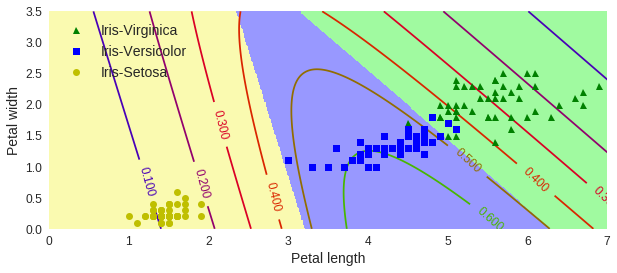

In [0]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

E vamos medir a acuracidade final do modelo no conjunto de teste:

In [0]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Nosso modelo perfeito acaba tendo pequenas imperfeições. Essa variabilidade provavelmente se deve ao tamanho muito pequeno do conjunto de dados: dependendo de como você mostra o conjunto de treinamento, o conjunto de validação e o conjunto de testes, é possível obter resultados bem diferentes. Tente alterar a semente aleatória e executar o código novamente algumas vezes, você verá que os resultados irão variar.